In [1]:
import sys
sys.path.append('../src')
sys.path.append('../code')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from diusst_model import diusst
from slab_class import Slab
from diusst_interpolation import cfl_interpolation, const_interpolation

In [2]:
data_path = '../input_data/moce5/'
data_filename = 'training_moce5_err-boatspd-x2_humid10.csv'

data_orig = pd.read_csv(data_path+data_filename)
data_orig

,times,sst,sst_err,ftemp,wind,atemp,swrad,humid,boatspd
0,31625.760,291.797,0.147397,291.538,0.947,290.451,695.5,0.01,12.3
1,32321.472,292.099,0.085068,291.222,1.015,290.947,635.6,0.01,12.4
2,33008.616,292.336,0.147397,291.748,1.167,290.868,559.7,0.01,12.3
3,35765.736,293.311,0.063959,290.777,1.739,291.826,737.2,0.01,1.5
4,36452.880,291.097,0.070329,291.185,2.471,291.596,774.3,0.01,0.5
...,...,...,...,...,...,...,...,...,...
1847,1736233.800,291.047,0.233219,291.618,1.458,291.480,0.5,0.01,8.1
1848,1736879.760,290.679,0.107123,291.191,1.189,291.589,0.5,0.01,8.4
1849,1737525.360,290.740,0.106192,291.205,0.435,291.640,0.6,0.01,8.2
1850,1738171.200,290.996,0.087068,291.312,0.900,291.616,0.6,0.01,8.1


In [29]:
data, data_dt, data_idx = cfl_interpolation(data_orig,kappa=1e-3,diffu_type='LIN')

times = data['times'].to_numpy()
wind = data['wind'].to_numpy()
swrad = data['swrad'].to_numpy()
airtemp = data['atemp'].to_numpy()
humid = data['humid'].to_numpy()

+++ Variable time-step interpolation +++
Interpolated dataset has 545683 time steps with average length 5.398 s.
Constant dt interpolation would require dt = 0.74 s --> 2305999 steps.
Computation time will be reduced by 76.336 %
++++++++++++++++++++++++++++++++++++++++


In [50]:
T_f = np.mean(data_orig['ftemp'].to_numpy())

slab = Slab(d=1,xi_1=1e-4, xi_2=1e-9,T_f=T_f)
sim = slab.simulate(times, wind, swrad, airtemp, humid)

In [51]:
data

,times,sst,sst_err,ftemp,wind,atemp,swrad,humid
0,31625.76,291.797000,0.147397,291.538000,0.947000,290.451000,695.500000,0.01
1,31635.76,291.801341,0.146501,291.533458,0.947977,290.458129,694.639012,0.01
2,31645.76,291.805682,0.145605,291.528916,0.948955,290.465259,693.778023,0.01
3,31655.76,291.810023,0.144710,291.524374,0.949932,290.472388,692.917035,0.01
4,31665.76,291.814364,0.143814,291.519832,0.950910,290.479518,692.056046,0.01
...,...,...,...,...,...,...,...,...
545678,1738781.20,291.019301,0.130542,291.491883,0.897204,291.611340,0.972815,0.01
545679,1738791.20,291.019683,0.131255,291.494832,0.897158,291.611263,0.978927,0.01
545680,1738801.20,291.020065,0.131968,291.497781,0.897112,291.611187,0.985039,0.01
545681,1738811.20,291.020447,0.132680,291.500730,0.897066,291.611111,0.991150,0.01


<IPython.core.display.Javascript object>


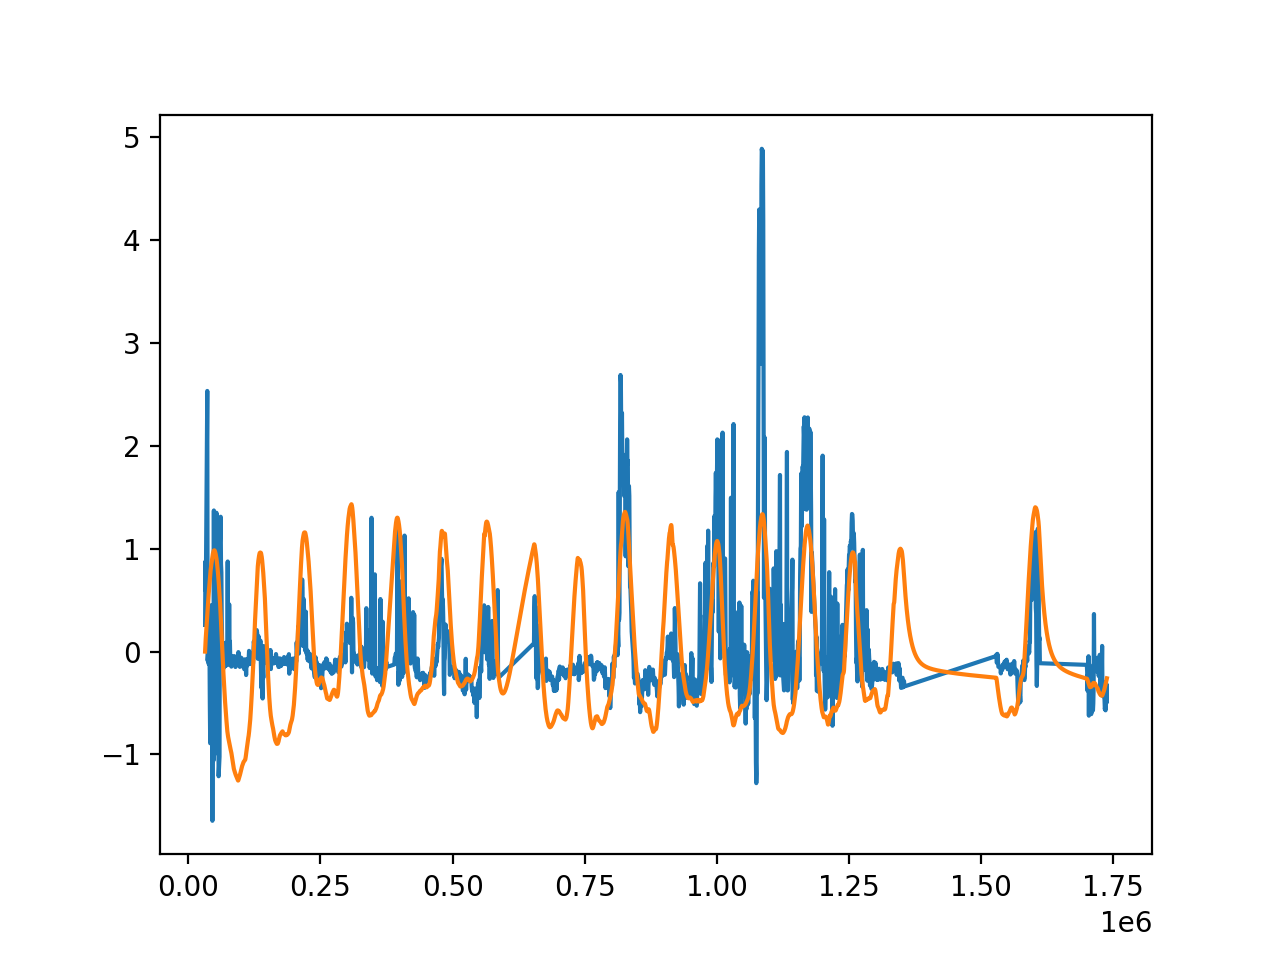

In [52]:
plt.plot(data_orig['times'],data_orig['sst']-data_orig['ftemp'])
plt.plot(times,sim-T_f)

In [45]:
497/395395000

1.2569708772240418e-06